# Finnish Architectural Landscape: A Statistical Cross Section



**What’s the point of using financial data to analize architectural offices?**

The economy as a social science is essentially concerned with how people interact with things of value. Knowing how much people are willing to pay for a particular service quite often (though not always) can give an approximate hint about the value it provides to society. Additionally, Financial information is always meticulously collected and stored for management and taxation purposes. Since every office collects and stores financial data in a similar manner, we have a common metrics to compare otherwise very different organizations. With the use of some basic descriptive statistics, we can now analyze the information in the field and hopefully gain some useful insights.

The table contains the following columns:
* "name": Office Name
* "street": Office street address
* "postcode": Office postal code 
* "city": Office City
* "latitude": Office latitude
* "longitude":Office longitude
* "turnover": [Turnover](https://www.investopedia.com/terms/t/turnover.asp) during 2019
* "change in turnover": Change in turnover from 2018
* "profit": [Profit](http://www.investopedia.com/terms/p/profit.asp) in 2019 financial year
* "operative profit": [operative profit](https://www.investopedia.com/terms/o/operating_profit.asp) in 2019 financial year
* "personnel": Number of Emploees in 2019 financial year

# Imports

In [1]:
import csv
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import geopandas as gpd

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Opening the dataset
dataframe = pd.read_csv(r"Database.csv")

# Dropping duplicate office names (Offices that have more than one location)
dataframe.drop_duplicates(subset= "name", inplace=True)

# Converting financials to millions 
dataframe["turnover"] = dataframe["turnover"] / 1000
dataframe["profit"] = dataframe["profit"] / 1000

#  Quick lookup

Let's glance at the underlying data and see what we got in our hands.

In [3]:
dataframe.head()

,name,street,postcode,city,latitude,longitude,turnover,change in turnover,profit,operative profit,personnel
0,Arkkitehtitoimisto Jari Hintsala,Leirintäalueentie 3,97700,Ranua,60.582240,24.071890,NaN,NaN,NaN,NaN,NaN
1,Arkkitehtitoimisto Juhani Aalto Oy,Iso Kylätie 43,04130,Sipoo,66.695766,27.562635,NaN,NaN,0.017,NaN,5.0
2,Aihio Arkkitehdit Oy,Satakunnankatu 18 A,33210,Tampere,61.501043,23.763256,6.413,"9,4%",1.028,"19,8%",58.0
3,Arkkitehtitoimisto Juha Tuhkanen Oy,Viipurinkatu 31 A 1,00520,Helsinki,60.193141,24.934214,0.010,"-54,5%",-0.001,-10%,1.0
4,Arkkitehtitoimisto Antti Heikkilä Oy,Äyritie 8 C,01510,Vantaa,60.292777,24.969730,0.394,"-13,6%",0.005,"1,3%",6.0


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1814 entries, 0 to 1871
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                1814 non-null   object 
 1   street              1814 non-null   object 
 2   postcode            1811 non-null   object 
 3   city                1811 non-null   object 
 4   latitude            1814 non-null   float64
 5   longitude           1814 non-null   float64
 6   turnover            588 non-null    float64
 7   change in turnover  529 non-null    object 
 8   profit              658 non-null    float64
 9   operative profit    592 non-null    object 
 10  personnel           374 non-null    float64
dtypes: float64(5), object(6)
memory usage: 170.1+ KB


We can see that the underlying table contains more geospatial information while the financial information for many of the offices is missing. Although this is not an ideal situation, this can hardly be avoided since often this information is harder to access for private companies. This kind of asymetry can result in biased study since the sample of **374** offices might not represent all **1814** well.

# Sample Size with Cochran’s Formula

**Is 374 offices big enough sample to represent 1800 offices?** Luckily this is a fairly standard question in statistics and there are ways to verify the sample size.
In this case we will use Cochran's Sample Size Formula to answer this question.
<br />
<br />

![Cochran's Sample Size Formula](https://www.smartsurvey.co.uk/assets/img/graphics/cochrans-formula.svg)

In our case the values are:<br /><br /> e = 5%<br /> p = 1814<br /> q = 1-p<br /><br /> If we proceed with calculation the result will be 317. Note that the Cochran's Sample Size Formula gives the minimum number of samples necessary for the desired confidence level. In our case, the Minimum number is **317** while our sample size is **374**.<br /><br /> Note that this is the column that contained the least amount of information the Table. With other variables, we are way above the minimum threshold, therefore, we can assume that the sample size is large enough to represent the whole market.

# Exploratory Data Analysis

In [5]:
plt.ioff()
sns.heatmap(dataframe.corr(method="pearson"), cmap="Blues", annot=True)

Already at this stage, we can see that there something going on between **"turnover"**, **"profit"** and **"personnel"** variables.<br> With this in mind, we can take a little closer look at the data with Seaborn's pairplot.

In [6]:
sns.pairplot(dataframe)

In [7]:
sns.pairplot(
    dataframe,
    x_vars=["turnover", "profit", "personnel"],
    y_vars=["turnover", "profit", "personnel"])

Already here we can roughly see that all three variables are correlated to some extent. Causal links between these variables can also be reliably established. Profit is normally some portion of companies turnover therefore the bigger the turnover the bigger the profit can potentially be. Of course, this is not always the case. High operational costs can result in a company with a huge turnover but with no profit. This relationship can be already seen in the graph above.

#  Some Insightful Questions

# Where is Finnish architecture produced?

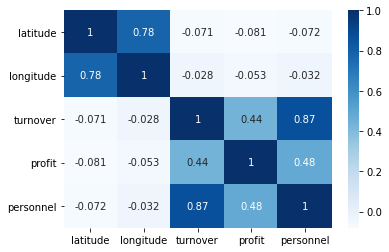

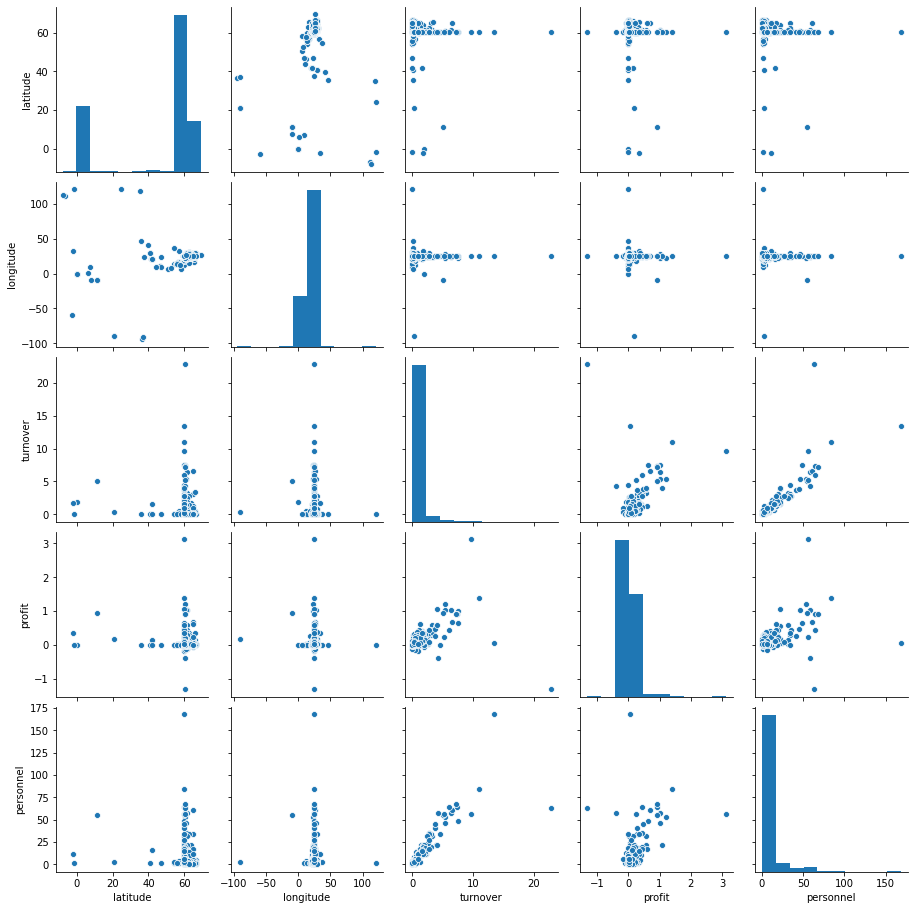

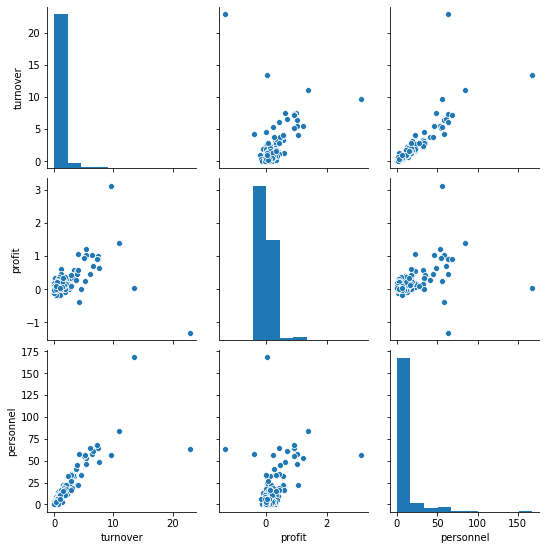

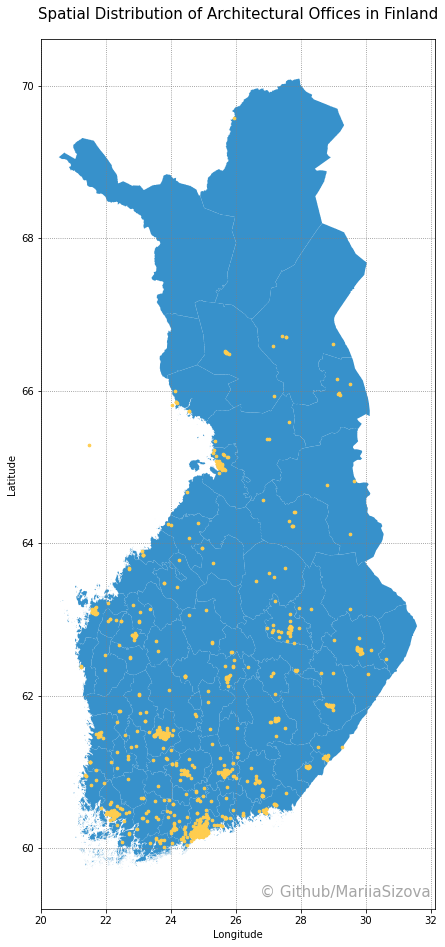

In [8]:
def mapPlot(dataframe):
    """
    """
    df = dataframe
    
    # Eliminating faulty coordinates
    df = df[df.latitude > 60]
    df = df[df.longitude > 21]
    
    # Base Map
    districts = gpd.read_file(r"FIN_adm3.shp")
    ax = districts.plot(color="#3791CB", figsize=(8,16), zorder=1)
    
    # Labels
    ax.set_title("Spatial Distribution of Architectural Offices in Finland", fontsize= 15, pad= 20)
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    
    # Geodataframe with dropped pins
    fin = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs = "EPSG:4326")
    fin.plot(ax=ax, color='#ffcd4f', markersize = 7, alpha = 1, zorder=2)
    
    # Legend & Grid
    plt.grid(linestyle=":", color='grey')
    
    # Watermark
    ax.text(0.99, 0.01, '© Github/MariiaSizova',
            verticalalignment='bottom', horizontalalignment='right',
            transform=ax.transAxes,
            color='grey',
            fontsize=15,
            alpha = 0.7)
    # Display
    plt.show()
    
mapPlot(dataframe)

The map shows the spatial distribution of architectural offices in Finland. Taking into account that Finland’s urbanization level is approximately 85.45%, It is not surprising that the majority of offices are clustered around metropolitan areas. Uusimaa is clearly the most densely packed region. An interesting observation is that 1.12% of offices are located above the arctic cycle. Furthermore, there is an architectural office registered above the 69th Latitude very close to the Finnish border with Norway. **Finnish respect for personal space illustrated at its best.**

# How big are architectural offices in Finland?

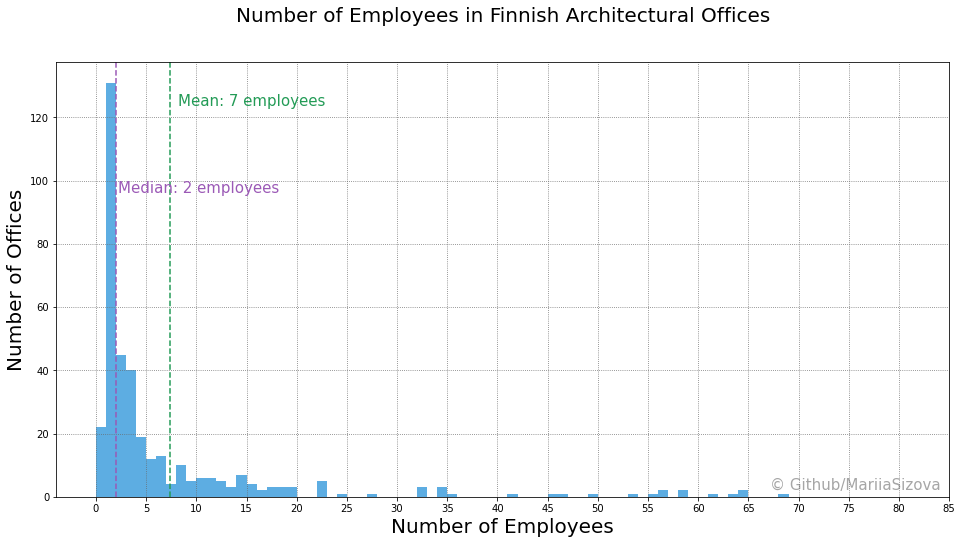

In [9]:
def personnelHist(dataframe):
    """
    """
    df = dataframe.copy()
    
    # Creating Figure & Axes
    fig, ax = plt.subplots(figsize=(16,8))

    # Plot
    ax.hist(df["personnel"], bins = range(80), color = "#5DADE2")
    
    # Mean & Median
    ax.axvline(df.personnel.mean(), color='#239B56', linestyle='dashed', linewidth=1.5)
    ax.axvline(df.personnel.median(), color='#9B59B6', linestyle='dashed', linewidth=1.5)
    
    # Labels
    ax.set_title( "Number of Employees in Finnish Architectural Offices", fontsize= 20, pad= 40)
    plt.xlabel("Number of Employees", fontsize=20)
    plt.ylabel("Number of Offices", fontsize=20)
    
    in_ylim, max_ylim = plt.ylim()
    ax.text(df.personnel.mean()*1.1, max_ylim*0.9, 'Mean: {:.0f} employees'.format(df.personnel.mean()), color = "#239B56",  fontsize= 15)
    ax.text(df.personnel.median()*1.1, max_ylim*0.7, 'Median: {:.0f} employees'.format(df.personnel.median()), color = "#9B59B6", fontsize= 15)
    
    # Ticks
    ax.set_xticks(range(0,90,5))
    
    # Legend & Grid
    ax.grid(linestyle=":", color='#696969')
    
    # Watermark
    ax.text(0.99, 0.01, '© Github/MariiaSizova',
            verticalalignment='bottom', horizontalalignment='right',
            transform=ax.transAxes,
            color='grey',
            fontsize=15,
            alpha = 0.7)
    
    plt.show()
    
personnelHist(dataframe)

The majority of the offices in Finland are definitely on a smaller side of the spectrum. 50% of offices have one or two employees. Naturally, when we have a positively skewed distribution the mean is not a reliable measure. The few outliers (offices with a very high number of employees) distort the mean value.

# Which offices have the Highest Turnover?

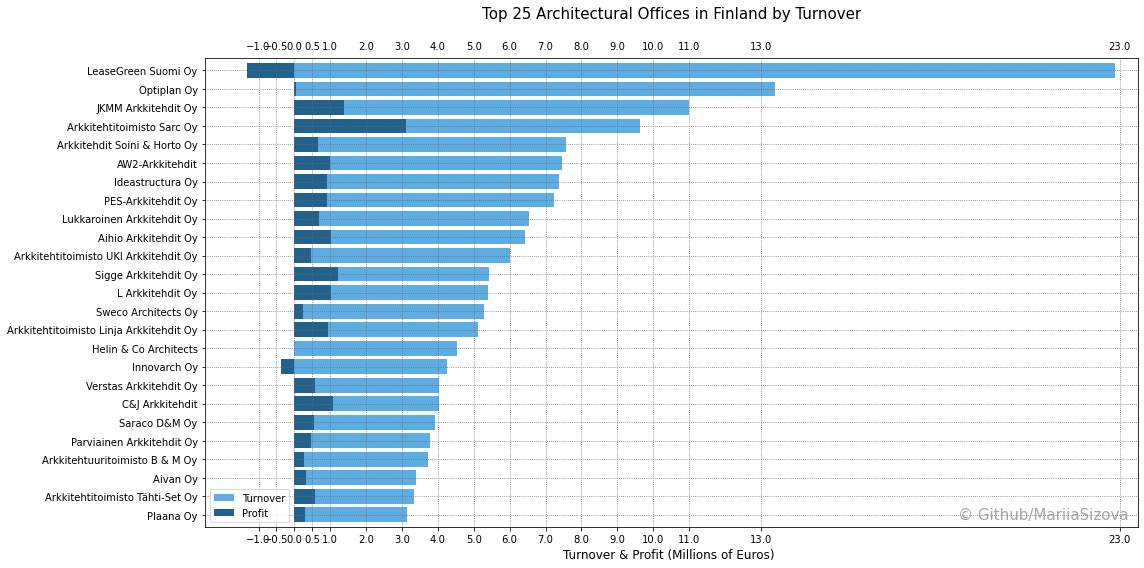

In [10]:
def byTurnover(dataframe,top_n):
    """
    Function plots the top_n offices by turnover from the given dataframe
    """
    df = dataframe.copy()

    # Filtering values
    higest_turnover = df.nlargest(top_n, ['turnover'])
    higest_turnover.reset_index( drop = True, inplace= True)

    # Plot
    ax = higest_turnover["turnover"].plot(kind = "barh", figsize= (16,8), width = 0.8, legend = True, color = "#5DADE2" ) 
    ax = higest_turnover["profit"].plot(kind = "barh", figsize= (16,8), width = 0.8, legend = True, color = "#21618C" ) 

    # Title
    ax.set_title("Top {} Architectural Offices in Finland by Turnover".format(top_n), fontsize= 15, pad= 40)
    
    # Axis & Labels 
    ax.set_xlabel("Turnover & Profit (Millions of Euros) ", fontsize=12)
    ax.set_xlim([-2.5,23.5])
    ax.invert_yaxis()
    
    # Ticks
    ax.set_xticks([-1,-0.5,0,0.5,1,2,3,4,5,6,7,8,9,10,11,13,23])
    
    # Labels
    ax.set_yticklabels(higest_turnover["name"])
    ax.tick_params(labeltop=True, labelright=False)
    
    # Legend & Grid
    ax.legend(["Turnover", "Profit"])
    ax.grid(linestyle=":", color='#696969')

    # Watermark
    ax.text(0.99, 0.01, '© Github/MariiaSizova',
            verticalalignment='bottom', horizontalalignment='right',
            transform=ax.transAxes,
            color='grey',
            fontsize=15,
            alpha = 0.7)

    plt.tight_layout()
    plt.show()

byTurnover(dataframe,25)

In the 2019 Architectural market as a whole was worth approximately 356.784.000 €. The market share of these 25 firms together accounts for 45.47% of the whole market. This might be a little concerning. This leaves 54.53% of available capital for the remaining offices to share. Naturally, this results in fierce competition between smaller offices.

# Which offices have the Highest Profit?

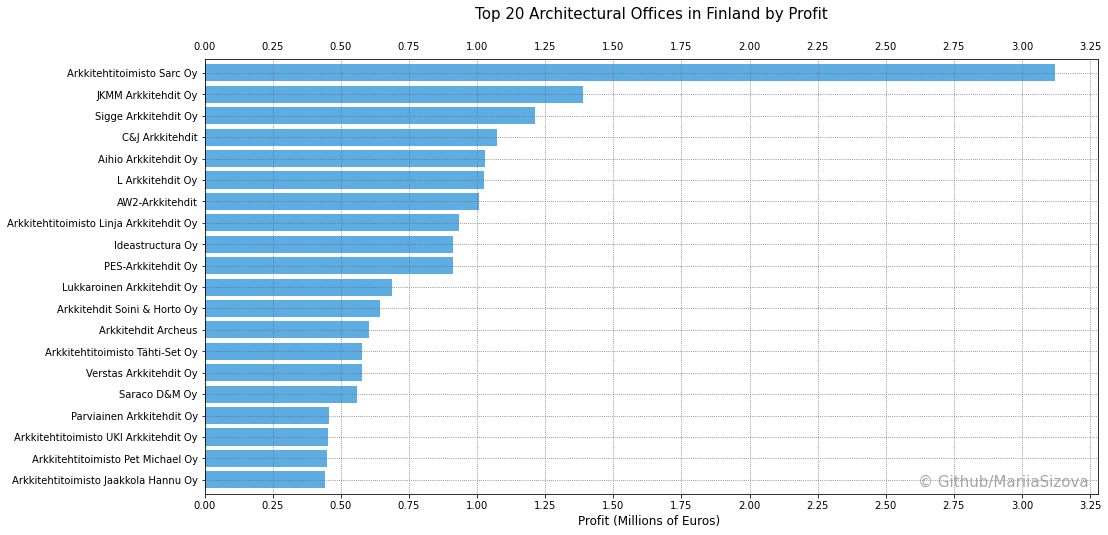

In [11]:
def byProfit(dataframe, top_n):
    """
    Function plots the top_n offices by profit from the given dataframe
    """
    df = dataframe.copy()
    
    # Filtering values
    df = dataframe.nlargest(top_n, ['profit'])
    df.reset_index(drop = True, inplace= True)

    # Dropping unused columns
    df.drop(columns=["turnover", 'operative profit', 'change in turnover', "personnel"], inplace = True)

    # Plot
    ax = df.profit.plot(kind = "barh", figsize= (16,8), width = 0.8, legend = False, color = "#5DADE2" ) 
    # Inverting Y axis
    ax.invert_yaxis()

    # Labels
    ax.set_title("Top {} Architectural Offices in Finland by Profit".format(top_n), fontsize= 15, pad= 40)  
    ax.set_xlabel("Profit (Millions of Euros) ", fontsize=12)
    ax.set_yticklabels(df["name"])

    # Ticks 
    ax.set_xticks([x * 0.25 for x in range(0, 14)])
    ax.tick_params(labeltop=True, labelright=False)
    
    # Legend & Grid
    ax.grid(linestyle=":", color='#696969')

    # Watermark
    ax.text(0.99, 0.01, '© Github/MariiaSizova',
            verticalalignment='bottom', horizontalalignment='right',
            transform=ax.transAxes,
            color='grey',
            fontsize=15,
            alpha = 0.7)

    plt.show()

byProfit(dataframe, 20)

# Which are the biggest Architectural offices in Finland?

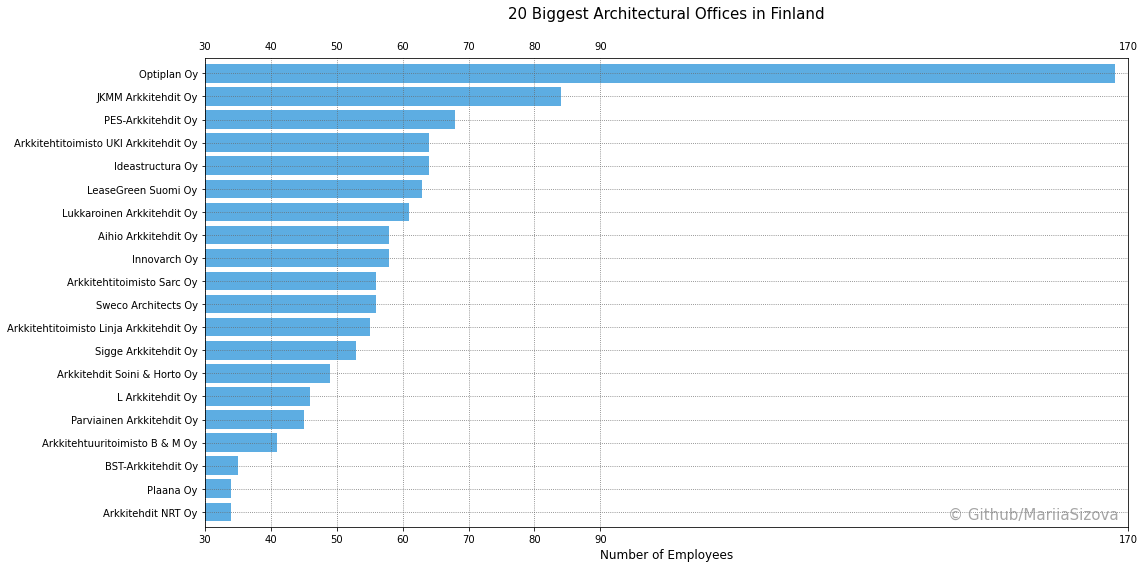

In [12]:
def byPersonnel(dataframe, top_n):
    """
    Function plots the top_n offices by personnel from the given dataframe
    """
    df = dataframe.copy()
    df = df.nlargest(top_n, ['personnel']).copy()

    # Data
    df.reset_index( drop = True, inplace= True)
    df.drop(columns=["turnover", 'operative profit', 'change in turnover', "profit"], inplace = True)

    # Plot
    ax = df.personnel.plot(kind = "barh", figsize= (16,8), width = 0.8, legend = False, color = "#5DADE2" ) 

    # Labels
    ax.set_title("{} Biggest Architectural Offices in Finland".format(top_n), fontsize= 15, pad= 40)
    ax.set_xlabel("Number of Employees", fontsize=12)
    ax.invert_yaxis()
    ax.set_xlim([30,170])
    
    # Ticks
    ax.set_yticklabels(df["name"])
    ax.set_xticks([30, 40, 50, 60, 70, 80,  90, 170])
    ax.tick_params(labeltop=True, labelright=False)

    # Legend & Grid
    ax.grid(linestyle=":", color='#696969')

    # Watermark
    ax.text(0.99, 0.01, '© Github/MariiaSizova',
            verticalalignment='bottom', horizontalalignment='right',
            transform=ax.transAxes,
            color='grey',
            fontsize=15,
            alpha = 0.7)

    plt.tight_layout()
    plt.show()
    

byPersonnel(dataframe, 20)

# How much profit offices make based on their size?

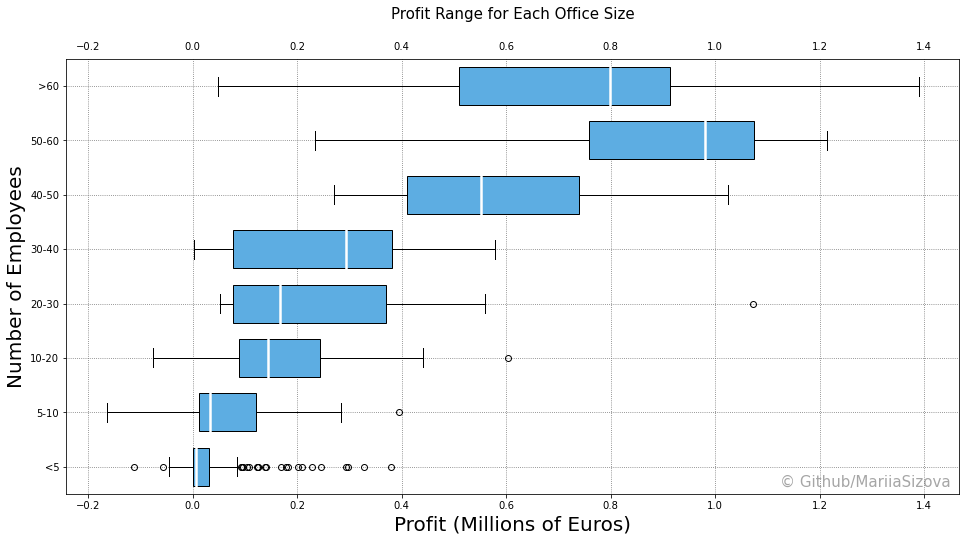

In [13]:
def boxes(dataframe):
    """
    This function plots a box plot grouped by number of emploees and profit
    """
    
    df_source = dataframe.copy()

    # Filtering Extreme Outliers
    df = df_source[(df_source['profit'] > -0.3) & ( df_source['profit'] < 2)]

    # Grouping offices by number of employees
    bins = [0,5,10,20,30,40,50,60,np.inf]
    labels = ["<5","5-10","10-20","20-30","30-40","40-50","50-60"," >60"]
    cut = df.assign(size=pd.cut(df['personnel'],bins,labels=labels))
    grouped_data = cut.groupby("size")
    d = dict(iter(cut.groupby("size")))
    data = []
    for i in d.keys():
        data.append(d[i]["profit"])

    # Creating Figure
    fig, ax = plt.subplots(figsize=(16,8))

    # Medianprops for the plot
    medianprops = dict(linestyle='-', linewidth=2.5, color='white')

    # Boxplot
    box = ax.boxplot(data, vert=False, patch_artist=True, widths=0.7, whis = 1.7, medianprops=medianprops)
    plt.setp(box["boxes"], facecolor="#5DADE2")

    # Labels
    ax.set_title("Profit Range for Each Office Size", fontsize= 15, pad= 40)
    ax.set_ylabel("Number of Employees", fontsize=20)
    ax.set_xlabel("Profit (Millions of Euros)", fontsize=20)
    
    # Ticks
    ax.tick_params(labeltop=True, labelright=False)
    ax.set_yticklabels(labels)

    # Legend & Grid
    ax.grid(linestyle=":", color='#696969')

    # Watermark
    ax.text(0.99, 0.01, '© Github/MariiaSizova',
            verticalalignment='bottom', horizontalalignment='right',
            transform=ax.transAxes,
            color='grey',
            fontsize=15,
            alpha = 0.7)

    plt.show()

boxes(dataframe)

What can be seen from the graph above is that the offices with more than 40 employees seem to generate higher median profit but they are also subjected to higher volatility in profits (possibly due to high operational costs). 30–40 employees seems to be the sweet spot. For offices of this scale, the median income is higher than in 95% of the offices in Finland yet the range of profits is not as vast as with the larger offices.

# How Finnish architectural offices grow?

At what rate should offices in Finland grow? Intuitively we understand that more profit leads to bigger offices with more employees. How are these variables correlated in reality?
In order to answer this question, it’s important to understand the causal relationships between these variables. Very often offices are paid more for bigger and more complex projects since big projects require more working hours to complete. Subsequently, the necessity to handle more complex projects might force the office to hire new employees. On the other hand, offices that have highly skilled workers or rely on automation do not necessarily need to scale at the same rate as other offices. With this in mind, let’s take a look at the simple scatter plot below.

y = 46.48x + 2.93


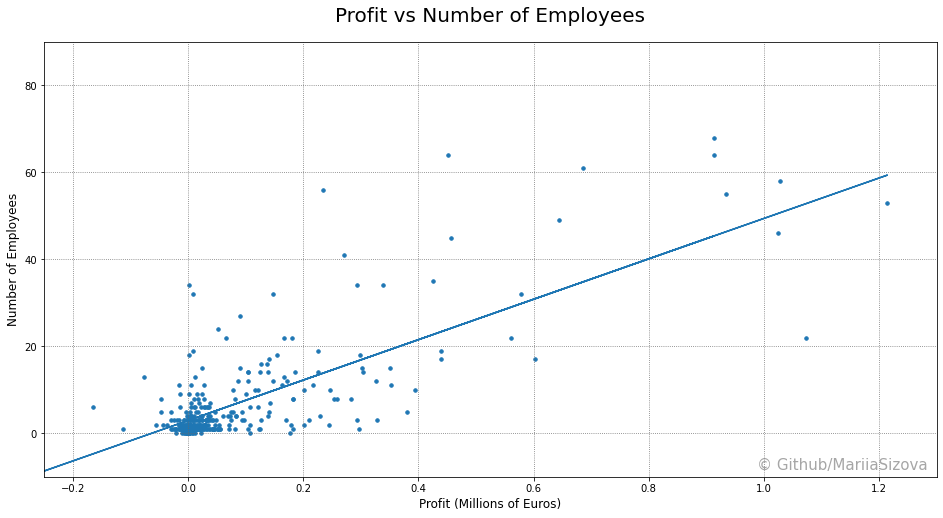

In [14]:
def linearReg(dataframe):
    """
    """
    df = dataframe.copy()
    
    # Drop NaN
    df.dropna(subset = ["personnel"], inplace=True)
    df.dropna(subset = ["profit"], inplace=True)
    
    # Isolating outliers
    df = df[df.profit > -0.5]
    df = df[df.profit < 3]
    df = df[df.personnel < 80]
    
    # Scatterplot Data
    xvals = df["profit"].astype(float)
    yvals = df["personnel"]

    # Linear Regression
    reg = LinearRegression().fit(np.vstack(xvals), yvals)
    df["predict"] = reg.predict(np.vstack(xvals))
    
    # Slope & Intercept
    b = reg.intercept_
    m = reg.coef_
    print("y = {:.2f}x + {:.2f}".format(m[0],b))
    
    # Creating Figure
    fig, ax = plt.subplots(figsize=(16,8))

    # Scatter Plot
    ax.scatter(xvals, yvals, s = 12)
    # Regression Line
    ax.plot(xvals, df["predict"])

    # Label
    ax.set_title("Profit vs Number of Employees", fontsize= 20, pad= 20)
    ax.set_xlabel("Profit (Millions of Euros)", fontsize=12)
    ax.set_ylabel("Number of Employees", fontsize=12)

    # Legend & Grid
    ax.grid(linestyle=":", color='#696969')

    # Limiting Graph Range
    ax.set_ylim([-10,90])
    ax.set_xlim([-0.25, 1.3])

    # Watermark
    ax.text(0.99, 0.01, '© Github/MariiaSizova',
            verticalalignment='bottom', horizontalalignment='right',
            transform=ax.transAxes,
            color='grey',
            fontsize=15,
            alpha = 0.7)
    
    plt.show()
    
linearReg(dataframe)

With simple linear regression, we can see that the variables are indeed positively correlated with a correlation coefficient of r = 0.699 (r =1 would mean perfect positive correlation, r = 0 no correlation, and r = -1 strong negative correlation). Although the regression does not describe the bigger offices accurately (due to the big variance in profits mentioned earlier) the general trend can still be identified. r = 0.699 is a relatively strong association. Note that Linear Regression sacrifices accuracy for each individual data point in order to illustrate the overall correlation.

# Does the profitability of the office depend on the postcode?

Below you can find an interactive scatterplot where companies are colour coded based on their postal code.

In [15]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

def color(seed):
    """
    Custum color coding by office postcode
    """
    np.random.seed(seed)
    color_code = [np.random.randint(0, 140),np.random.randint(100, 200),np.random.randint(200, 210)]
    return '#%02X%02X%02X' % tuple(color_code)

def linReg(dataframe):
    """
    """
    df = dataframe.copy()

    df.dropna(subset = ["personnel", "profit", "postcode"], inplace=True)

    # Isolating Outliers
    df = df[ (df['profit'] < 3)  &  (df['profit'] > -0.2) ]
    df = df[ (df["personnel"] < 100) & (df["personnel"] != 0)]
    df["profit"] = 1000000 * df["profit"]
    
    # Color coding by postal number
    df["postcode"].astype(int)
    df['color'] = df['postcode'].astype(int).apply(lambda x: color(x))
    
    # Data
    xvals = df["profit"].astype(float)
    yvals = df["personnel"]

    # LinearRegression
    reg = LinearRegression().fit(np.vstack(xvals), yvals)
    df["predict"] = reg.predict(np.vstack(xvals))
    
    # Figure
    fig = go.Figure()
    
    # Trace
    fig.add_trace(go.Scatter(name = "Office",
                                    x=xvals,
                                    y=yvals,
                                    mode='markers',
                                    marker_color=df['color'],
                                    text=df['name'],
                                    hovertemplate="Name: %{text}<br>Profit(€): %{x}<br>Emploees: %{y}"
                                    ))
    # Trace
    fig.add_trace(go.Scatter(name='Market trend', x=xvals, y=df["predict"], mode='lines', hoverinfo = "skip", line=dict(color="#5DADE2", width=2)))

    # Layout
    fig.update_layout(title='Profit vs Number of Employees', width=700, height=400)

    fig.show()

linReg(dataframe)